IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

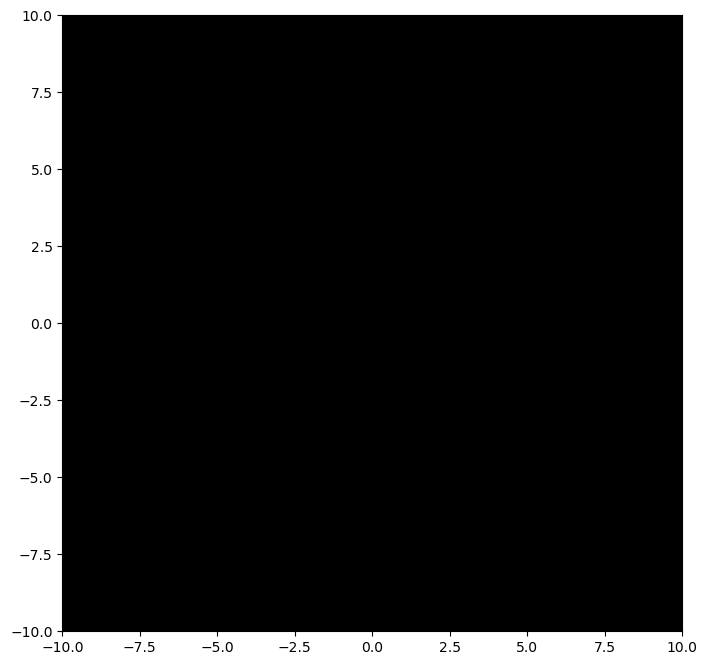

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters for the GRB simulation
num_frames = 100
max_radius = 10
fps = 30

# Create a figure for the animation
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-max_radius, max_radius)
ax.set_ylim(-max_radius, max_radius)
ax.set_facecolor('black')

# Initialize the scatter plot
scat = ax.scatter([], [], s=100, c=[], cmap='plasma', alpha=0.8)

# Function to initialize the scatter plot
def init():
    scat.set_offsets([])
    scat.set_array([])
    return scat,

# Function to update the scatter plot for each frame
def update(frame):
    # Calculate the radius for the current frame
    radius = (frame / num_frames) * max_radius
    
    # Create a circular distribution of points
    num_points = 1000
    theta = np.linspace(0, 2 * np.pi, num_points)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    
    # Calculate intensity based on distance from the center
    intensity = np.exp(-radius / max_radius)  # Decay function for intensity
    
    # Update scatter plot
    scat.set_offsets(np.column_stack((x, y)))
    scat.set_array(intensity * np.ones(num_points))  # Update color based on intensity
    scat.set_sizes(100 * (1 - radius / max_radius))  # Change size based on radius
    return scat,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)

# Save the animation as a video file
ani.save('grb_simulation.mp4', writer='ffmpeg', fps=fps)

plt.show()